#**Proyecto DS: Estudio de dataset conteniendo datos de atletas Olímpicos entre los años 1869 y 2016**

**Descripción:**

Los Juegos Olímpicos son la única competición verdaderamente global, multideportiva y que celebra el deporte a nivel mundial. Con más de 200 países participando en más de 400 eventos entre los Juegos de Verano e Invierno.
Dada la magnitud de este evento cada país debe presentar a sus atletas más prominentes para poder hacerse con el preciado oro. Los mismos dedican sus vidas a cumplir con exigentes rutinas de entrenamiento para superar los estándares de la competición y destacarse del resto.

---
**Relatos de interés**

En los Juegos olímpicos de Tokio 2020 se hizo un recopilación de historias contadas por los mismísimos atletas.

Amy Hunt, de Reino Unido que compite en atletismo. Ganó una medalla de oro en el Campeonato Europeo de Atletismo Sub-20 de 2019. Ella nos cuenta que desde pequeña era admiradora de Jess Ennis, una atleta de su mismo país. Siempre mantuvo los ojos en ella y fue una gran inspiración para su carrera, inclusive mencionó tener un poster de su ídola en la pared.

Elodie Clouvel, de Francia compite en pentatlón moderno. Obtuvo su primer medalla de plata en los Juegos del 2016. Su primer recuerdo de las Olimpiadaes es de Atenas 2004 cuando Laure Manaudou, en natación se consagró campeona de los 400 metros libres. En ese momento Elodie lloró de la emoción, dándose cuenta de que anhelaba ser atleta olímpica y su sueño era posible.

Estas historias nos demuestran lo importante que es para muchos deportistas alcanzar a ser como sus ídolos forjados desde su infancia. Ahí radica la importancia de nuestro trabajo, el cual es una herramienta muy importante para que ellos puedan alcanzar sus objetivos de la mejor manera posible. Conocer las mejores aptitutes a trabajar es la mitad del trabajo, el resto queda en su determinación y voluntad.

---

**Público de interés:**

El proyecto está dirigido a cualquier individuo interesado en conocer cuales son los atributos más importantes para que un atleta Olímpico sea exitoso.
No es necesario tener un conocimiento previo del tema ya que las variables que trabajaremos son comunes en la descripción de un individuo sin importar el campo estudiado.

---

**Contexto comercial**

El mundo del atletismo se vuelve más competitivo día a día. Los eventos olímpicos cada vez aumentan su concurrencia con atletas más preparados y capaces, esto se refleja en nuevos records y la aparición de atletas modelos.
Nosotros queremos identificar los parámetros clave a trabajar para obtener mejores resultados basándonos en las base de dato de Juegos Olímpicos. De esta manera podremos identificar en donde debemos trabajar para alcanzar mejores resultados a nivel competitivo. Lo mismo aplica para entrenadores que desean mejorar la performance de sus equipos o cazadores de talento en búsqueda de atletas con el mayor potencial posible.

---

**Problema comercial**

Analizaremos los datos y crearemos visualizaciones para contestar las siguientes interrogantes en este orden:


*   Comenzando con los parámetros que pueden mostrar una gran varianza ¿Cuál es el peso y altura que identifica a buenos atletas ?
*   Existe un compromiso entre juventud y experiencia. ¿Que edad tienen los atletas más prominentes?
*  ¿Hay un  cambio en esta tendencia a lo largo del tiempo?
*  ¿Cuales nacionalidades presentan una mayor taza de victorias?
*  ¿Cómo afecta el sexo del atleta en estos parámetros?


Se evaluarán parámetros como sexo, altura, peso, edad y nacionalidad a nivel de atletas en general.

---

**Objetivo:**

Identificar los atributos que se relacionan con el éxito de los atletas olímpicos basándonos en la obtención de medallas.


In [99]:
#Importamos dataset desde github
df=pd.read_csv('https://raw.githubusercontent.com/PabloCalabrese/Coder/main/athlete_events.csv')

In [3]:
#Librerias para gestión de dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from bokeh.io import output_notebook, show, reset_output
import bokeh
from bokeh.plotting import figure

df = pd.read_csv('athlete_events.csv',sep=',')
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


(271116, 15)

# Variables de estudio:

*   ID: Número identificador del atleta
*   Name: Nombre completo del atleta   
*   Sex: Género (Masculino/Femenino)
*   Age: Edad (años)
*   Height: Altura (cm)
*   Weight: Peso (Kg)
*   Team: Nacionalidad
*   NOC: Comité Olímpico Nacional
*   Games: Tipo de evento (Verano/Invierno)
*   Year: Año de participación
*   Season: Estación en que se realiza evento
*   City: Ciudad donde se participa
*   Sport: Categoría de la disciplina realizada
*   Event: Nombre completo de disciplina
*   Medal: Medalla ganada (Cobre/Plata/Oro)


# Limpieza de datos

Eliminaremos los parámetros que no sean de interes para nuestro estudio y los datos duplicados.

Analizaremos la presencia/influencia de outliers y tomaremos acciones en función de ello.

Analizaremos la presencia/influencia de NaN y tomaremos acciones en función de ello.

In [4]:
#Se suprime columna Season (Coincide con variable Games por lo que se decide suprimirla)
df.drop('Season', axis='columns', inplace=True)
#Se suprime ID ya que no aporta al estudio
df.drop('ID', axis='columns', inplace=True)
#Se suprime Games ya que no se diferenciará el perfil de atleta segùn juegos de Invierno o Verano
df.drop('Games', axis='columns', inplace=True)
#Se suprime NOC ya que se tomara Team como Nacionalidad
df.drop('NOC', axis='columns', inplace=True)


In [5]:
df.head()

,Name,Sex,Age,Height,Weight,Team,Year,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,1992,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,2012,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,1920,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
#se buscan duplicados en el dataset
df.duplicated().count

<bound method Series.count of 0         False
1         False
2         False
3         False
4         False
          ...  
271111    False
271112    False
271113    False
271114    False
271115    False
Length: 271116, dtype: bool>

No se encuentra duplicados por lo que no se necesita removerlos

In [7]:
#Se remplazan los NaN con valores medios para evitar variaciones no deseadas en las tendencias
df.fillna(df.median(), inplace=True)

<ipython-input-7-c255e157d4ba>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


In [8]:
df.head()

,Name,Sex,Age,Height,Weight,Team,Year,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,1992,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,2012,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,175.0,70.0,Denmark,1920,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,175.0,70.0,Denmark/Sweden,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [9]:
#Luego de reemplazar los NaN que se pueden llenar con valores medios se precede a cambiar los NaN de la columna Medal
df = df.replace(np.nan,'None')
df

,Name,Sex,Age,Height,Weight,Team,Year,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,1992,Barcelona,Basketball,Basketball Men's Basketball,None
1,A Lamusi,M,23.0,170.0,60.0,China,2012,London,Judo,Judo Men's Extra-Lightweight,None
2,Gunnar Nielsen Aaby,M,24.0,175.0,70.0,Denmark,1920,Antwerpen,Football,Football Men's Football,None
3,Edgar Lindenau Aabye,M,34.0,175.0,70.0,Denmark/Sweden,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
...,...,...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,M,29.0,179.0,89.0,Poland-1,1976,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,None
271112,Piotr ya,M,27.0,176.0,59.0,Poland,2014,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",None
271113,Piotr ya,M,27.0,176.0,59.0,Poland,2014,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",None
271114,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,1998,Nagano,Bobsleigh,Bobsleigh Men's Four,None


In [10]:
#Consultamos la moda de las alturas para determinar eje de corte con nuestra línea de tendencia
df['Height'].mode()

0    175.0
Name: Height, dtype: float64

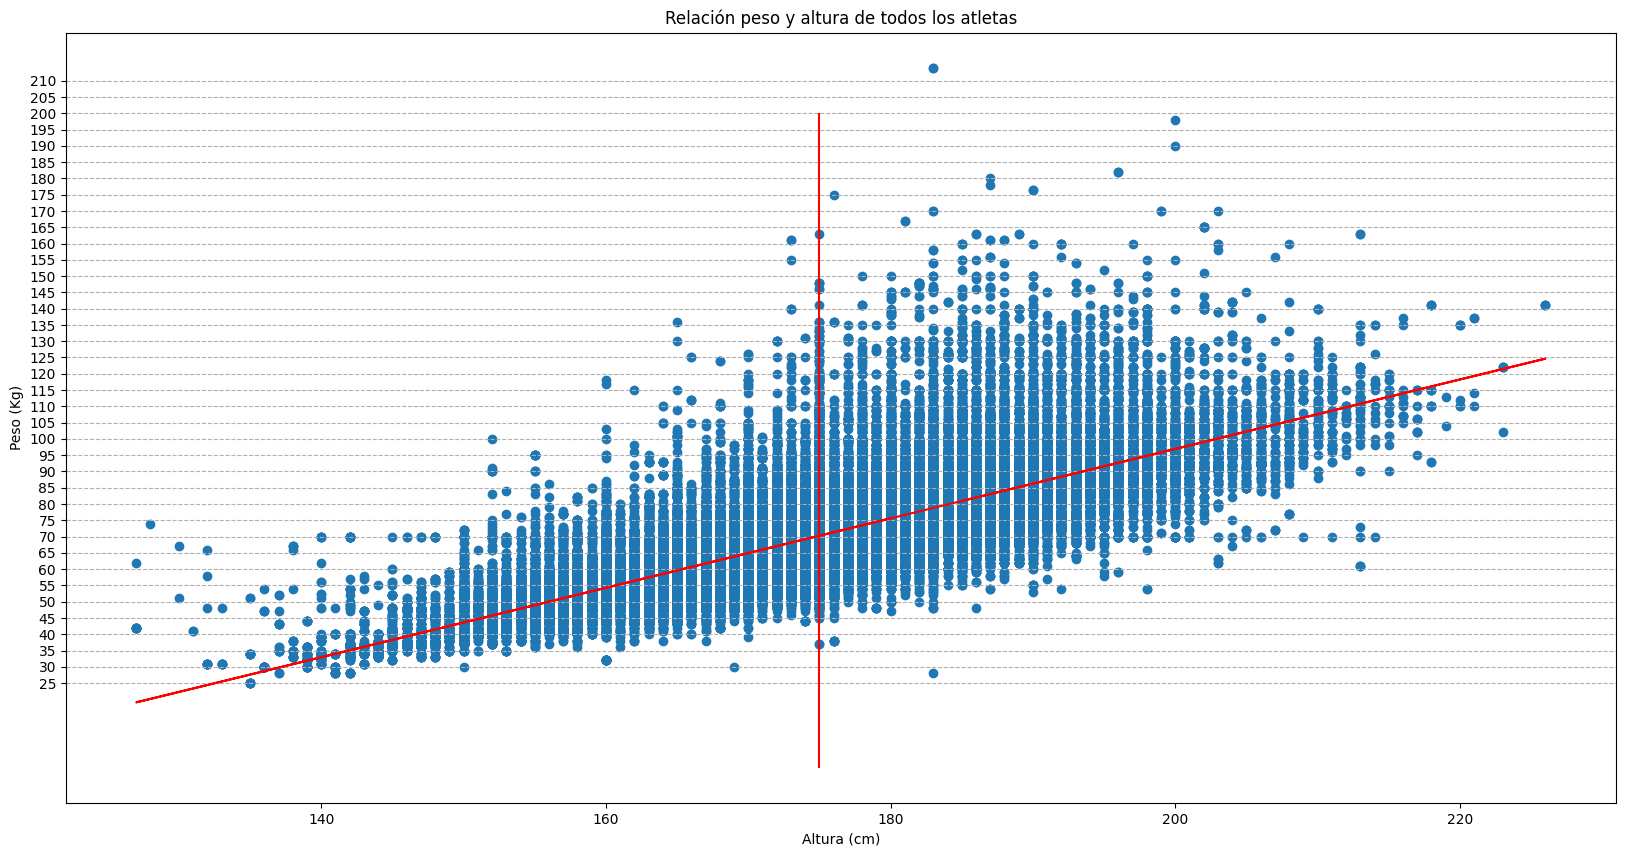

In [11]:
#Se grafican altura en función del peso para aproximar una relación entre ambas en un atleta promedio
x = df.Height
y = df.Weight
plt.figure(figsize=(20, 10))
plt.yticks(np.arange(min(y), max(y)+1, 5))
plt.grid(axis='y', linestyle='dashed')
plt.title('Relación peso y altura de todos los atletas')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (Kg)')
slope, intercept = np.polyfit(x, y, 1)
trendline = slope * x + intercept
plt.scatter(x, y, label='Data')
plt.plot(x, trendline, color='red', label='Trendline')
plt.vlines(x=175, ymin=-1, ymax=200,colors='r')

Se considera la media de Peso para establecer el punto de corte con la línea de tendencia horizontal. De este modo se establece que el atleta promedio tiene una altura de **175cm** y pesa **70Kg**.

Los valores límite que se observan en Peso y Altura se encuentran dentro de lo esperado por lo que no se identifican outliers que puedan compromoeter nuestro estudio.

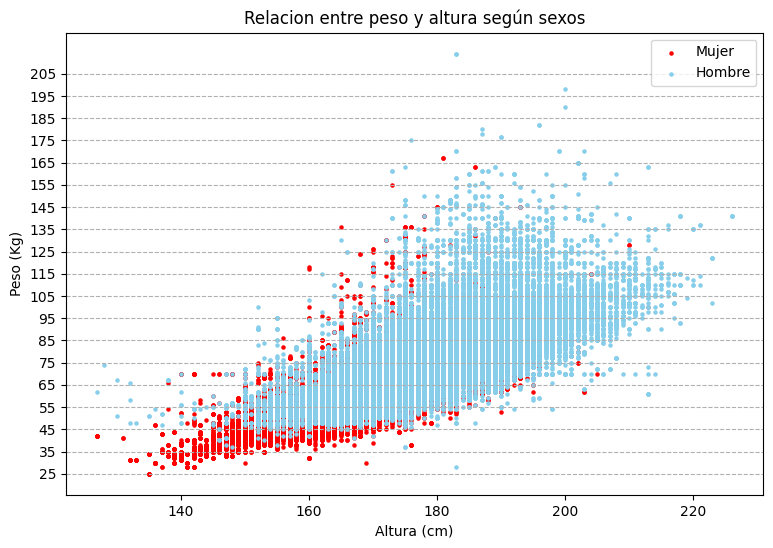

In [12]:
#se procede de la misma manera pero considerando la variable del sexo para saber si hay variaciones significativas
plt.figure(figsize=(9,6))
plt.scatter(df.Height[df.Sex=="F"], df.Weight[df.Sex=="F"], color='red', s=5, label='Mujer')
plt.scatter(df.Height[df.Sex=="M"], df.Weight[df.Sex=="M"], color='skyblue', s=5, label='Hombre')
plt.legend()
plt.title('Relacion entre peso y altura según sexos')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (Kg)')
plt.yticks(np.arange(min(y), max(y)+1, 10))
plt.grid(axis='y', linestyle='dashed')

Se observa que la dispersión de las mujeres inicia con valores menores tanto de peso y altura. Además en el caso de los hombres alcanzan valores mayores en ambos parámetros por lo que será mejor plantear el análisis según los sexos

In [13]:
a = df['Height'][df["Sex"]=="F"][df["Medal"]=="Gold"]
modea = a.mode
modea()

0    175.0
Name: Height, dtype: float64

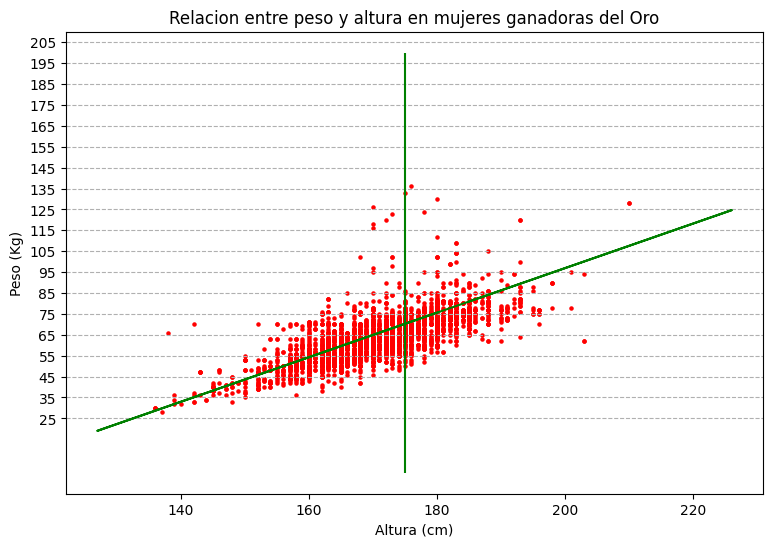

In [14]:
plt.figure(figsize=(9,6))
plt.scatter(df.Height[df.Sex=="F"][df.Medal=='Gold'], df.Weight[df.Sex=="F"][df.Medal=='Gold'], color='red', s=5, label='Mujer')
plt.title('Relacion entre peso y altura en mujeres ganadoras del Oro')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (Kg)')
plt.yticks(np.arange(min(y), max(y)+1, 10))
plt.grid(axis='y', linestyle='dashed')
plt.plot(x, trendline, color='green', label='Trendline')
plt.vlines(x=int(modea()), ymin=-1, ymax=200,colors='g')

In [15]:
b = df['Height'][df["Sex"]=="M"][df["Medal"]=="Gold"]
modeb = b.mode
modeb()

0    175.0
Name: Height, dtype: float64

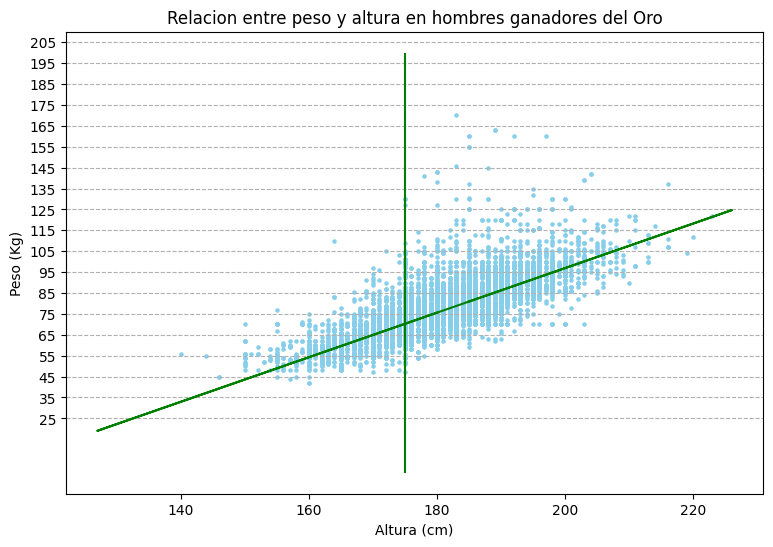

In [16]:
plt.figure(figsize=(9,6))
plt.scatter(df.Height[df.Sex=="M"][df.Medal=='Gold'], df.Weight[df.Sex=="M"][df.Medal=='Gold'], color='skyblue', s=5, label='Hombre')
plt.title('Relacion entre peso y altura en hombres ganadores del Oro')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (Kg)')
plt.yticks(np.arange(min(y), max(y)+1, 10))
plt.grid(axis='y', linestyle='dashed')
plt.plot(x, trendline, color='green', label='Trendline')
plt.vlines(x=int(modeb()), ymin=-1, ymax=200,colors='g')

Al analizar los sexos por separado se obtiene los siguientes resultados

Mujeres el peso objetivo es de **65kg** y altura de **171cm**

Hombres el peso objetivo es de **75Kg** y altura de **180Kg**

Se tiene en cuenta que existen algunos outliers pero por su baja cantidad no son significativos para el análsis. Tambien se observa que las dispersiones obtenidas en los ganadores del Oro para ambos sexos son mucho mas compactas que las obtenidas para el total de atletas lo cual era de esperarse ya que son condiciones alcanzadas por los atletas élite. Al comparar los valores obtenidos por cada sexo se observa una marcada diferencia en ambos atributos lo cual se puede atribuir a las caracterísitcas inherentes de cada género como ser densidad ósea, composicion mucular o adiposa, etc

In [17]:
#Analizamos los rangos de edad que ontienen mayor cantidad de mdeallas de oro
cortes = pd.cut(df.Age, np.arange(0,100,5))
agemedal = pd.crosstab(cortes.values,df.Medal.values)

Text(0.5, 1.0, 'Medallas de oro ganadas por rangos de edad')

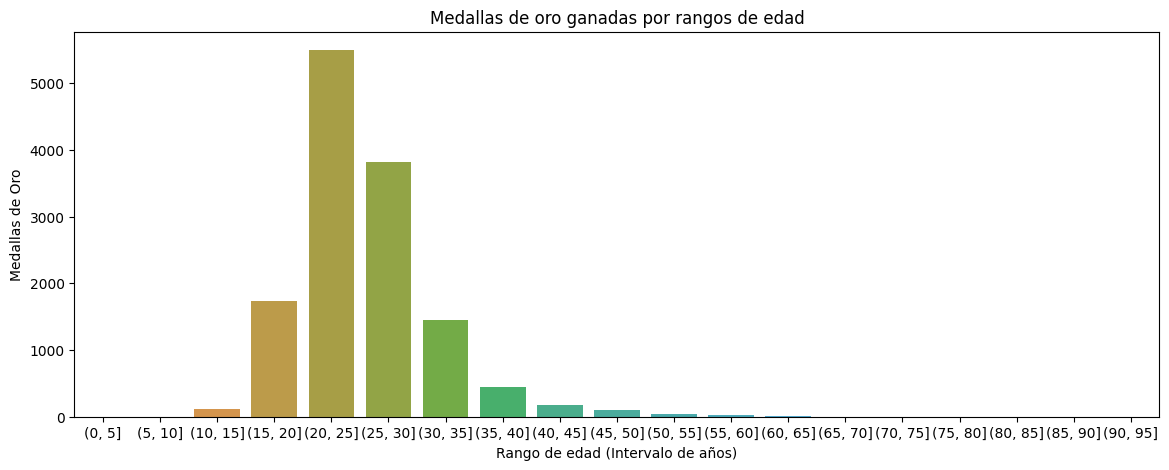

In [18]:
# Promedio de edad de atleta ganador de oro
fig,ax=plt.subplots(figsize=(14,5))
sns.barplot(x=agemedal.index, y="Gold", data=agemedal, ax=ax)
ax.set_xlabel('Rango de edad (Intervalo de años)')
ax.set_ylabel('Medallas de Oro')
ax.set_title('Medallas de oro ganadas por rangos de edad')

Definimos un rango de edad de **20 a 25 años** como valores óptimos para atletas exitosos

Text(0, 0.5, 'Cantidad')

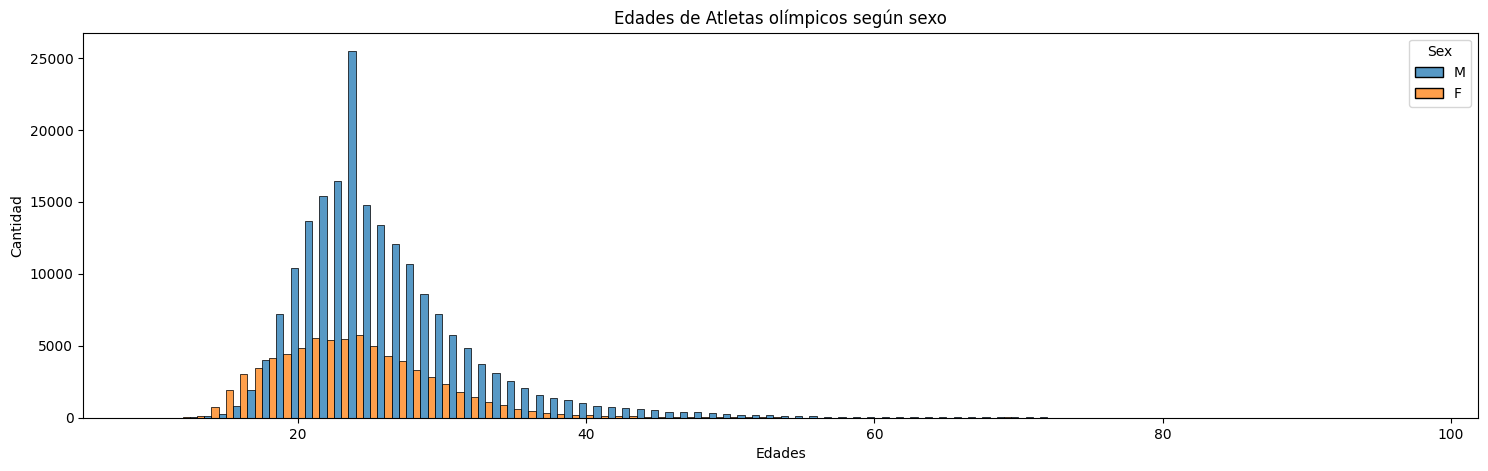

In [19]:
#Se incorpora la variable de edad para ver la distribución de ambos sexos según la edad
plt.figure(figsize=(18,5))
sns.histplot(data=df, x="Age", hue="Sex", multiple="dodge", discrete=True)
plt.title("Edades de Atletas olímpicos según sexo")
plt.xlabel('Edades')
plt.ylabel('Cantidad')

En ambos casos el máximo se situa entre **20 y 25** años (parámetro de edad es independiente del sexo)

Text(0, 0.5, 'Edad')

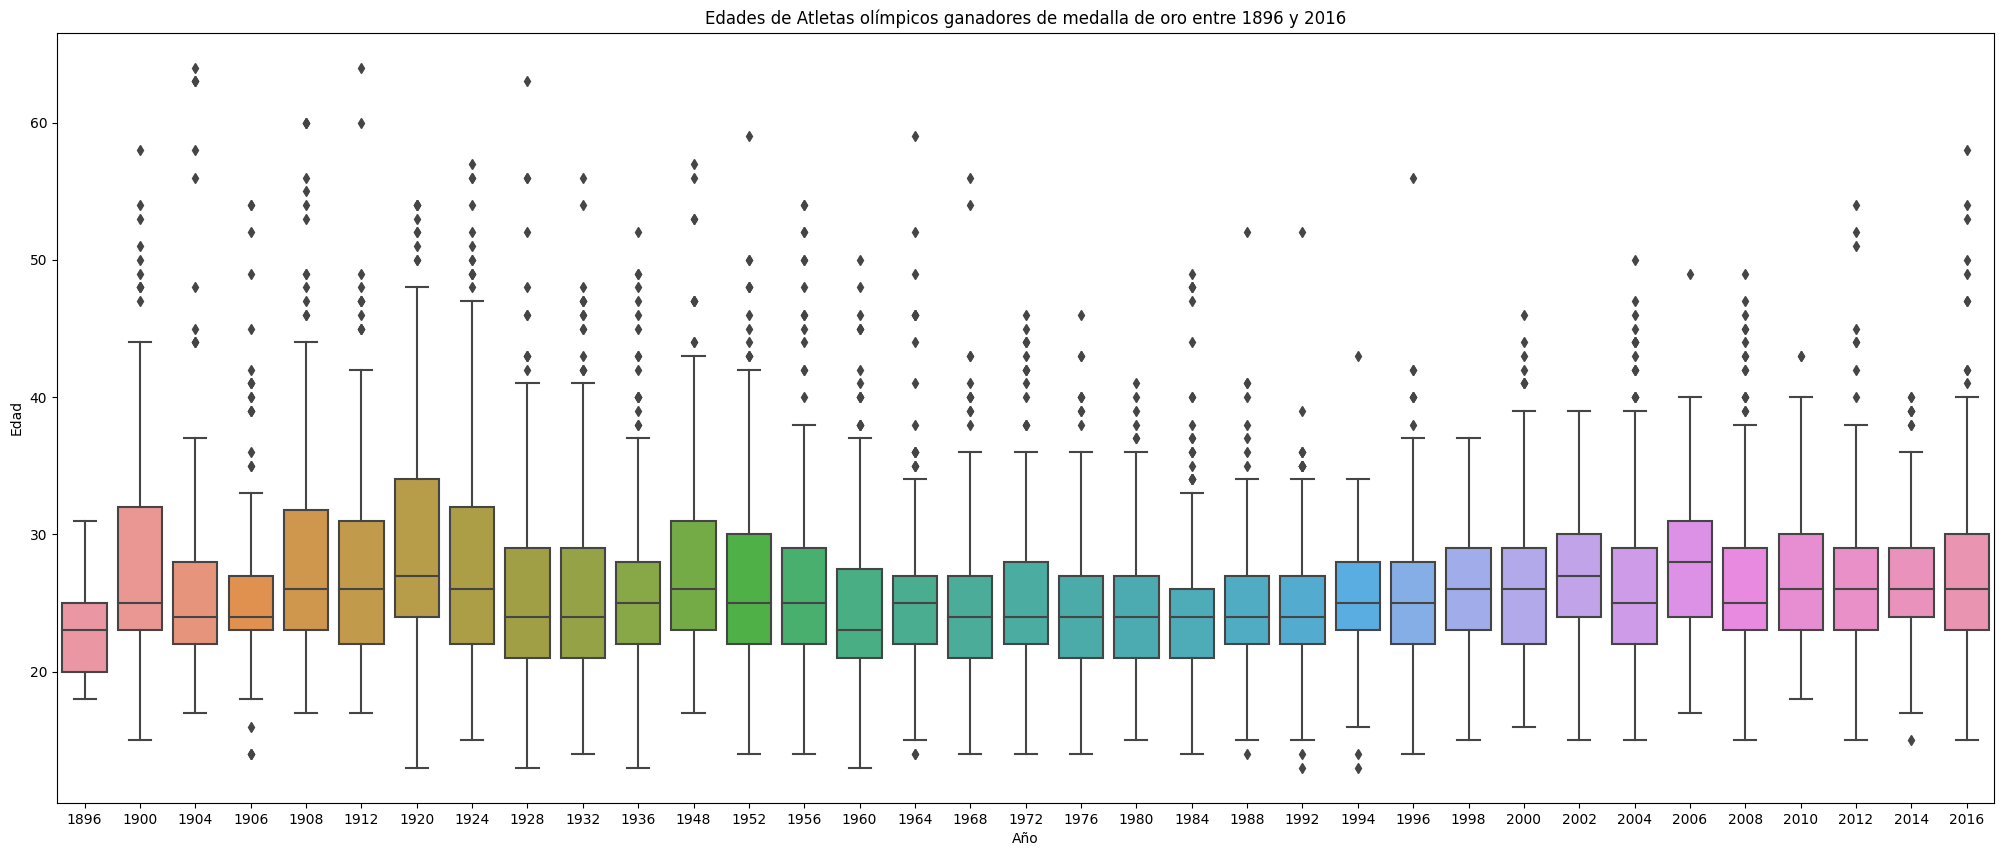

In [20]:
#Se evalua para ver si la edad de los competidores a variado durante los años de competición
gold = df[df['Medal']=='Gold']
plt.figure(figsize=(25, 10))
ax = sns.boxplot(x='Year', y='Age', data=gold)
plt.title("Edades de Atletas olímpicos ganadores de medalla de oro entre 1896 y 2016")
plt.xlabel('Año')
plt.ylabel('Edad')

Como era de esperarse las edades mantienen la media entre los 20 y 25 años durante el pasar de los años. Sin embargo entre 1912 y 1924 se observa un gran ensanchamiento en los cuartiles incluyendo en gran parte edades mayores a la media esperada. Este suceso se puede asociar a la Primera Guerra Mundial, momento en el que varios atletas no participaron por estar involucrados en este conflicto. Este fenómeno vuelve a repetirse en 1948 cuando se desarrolla la Segunda Guerra Mundiual

In [21]:
#Se crea df con ganadores de medallas de oro
gold = df[df['Medal']=='Gold']

In [22]:
df2=gold[['Sex','Team','Medal']].groupby(by=['Team','Sex']).count().reset_index()
sdf2 = df2.sort_values(by='Medal', ascending=True)
sdf3 = sdf2[sdf2['Medal']>100]
#Se filtarn los paises que tienen ganadas mas de 100 medallas de oro en el periodo estudiado

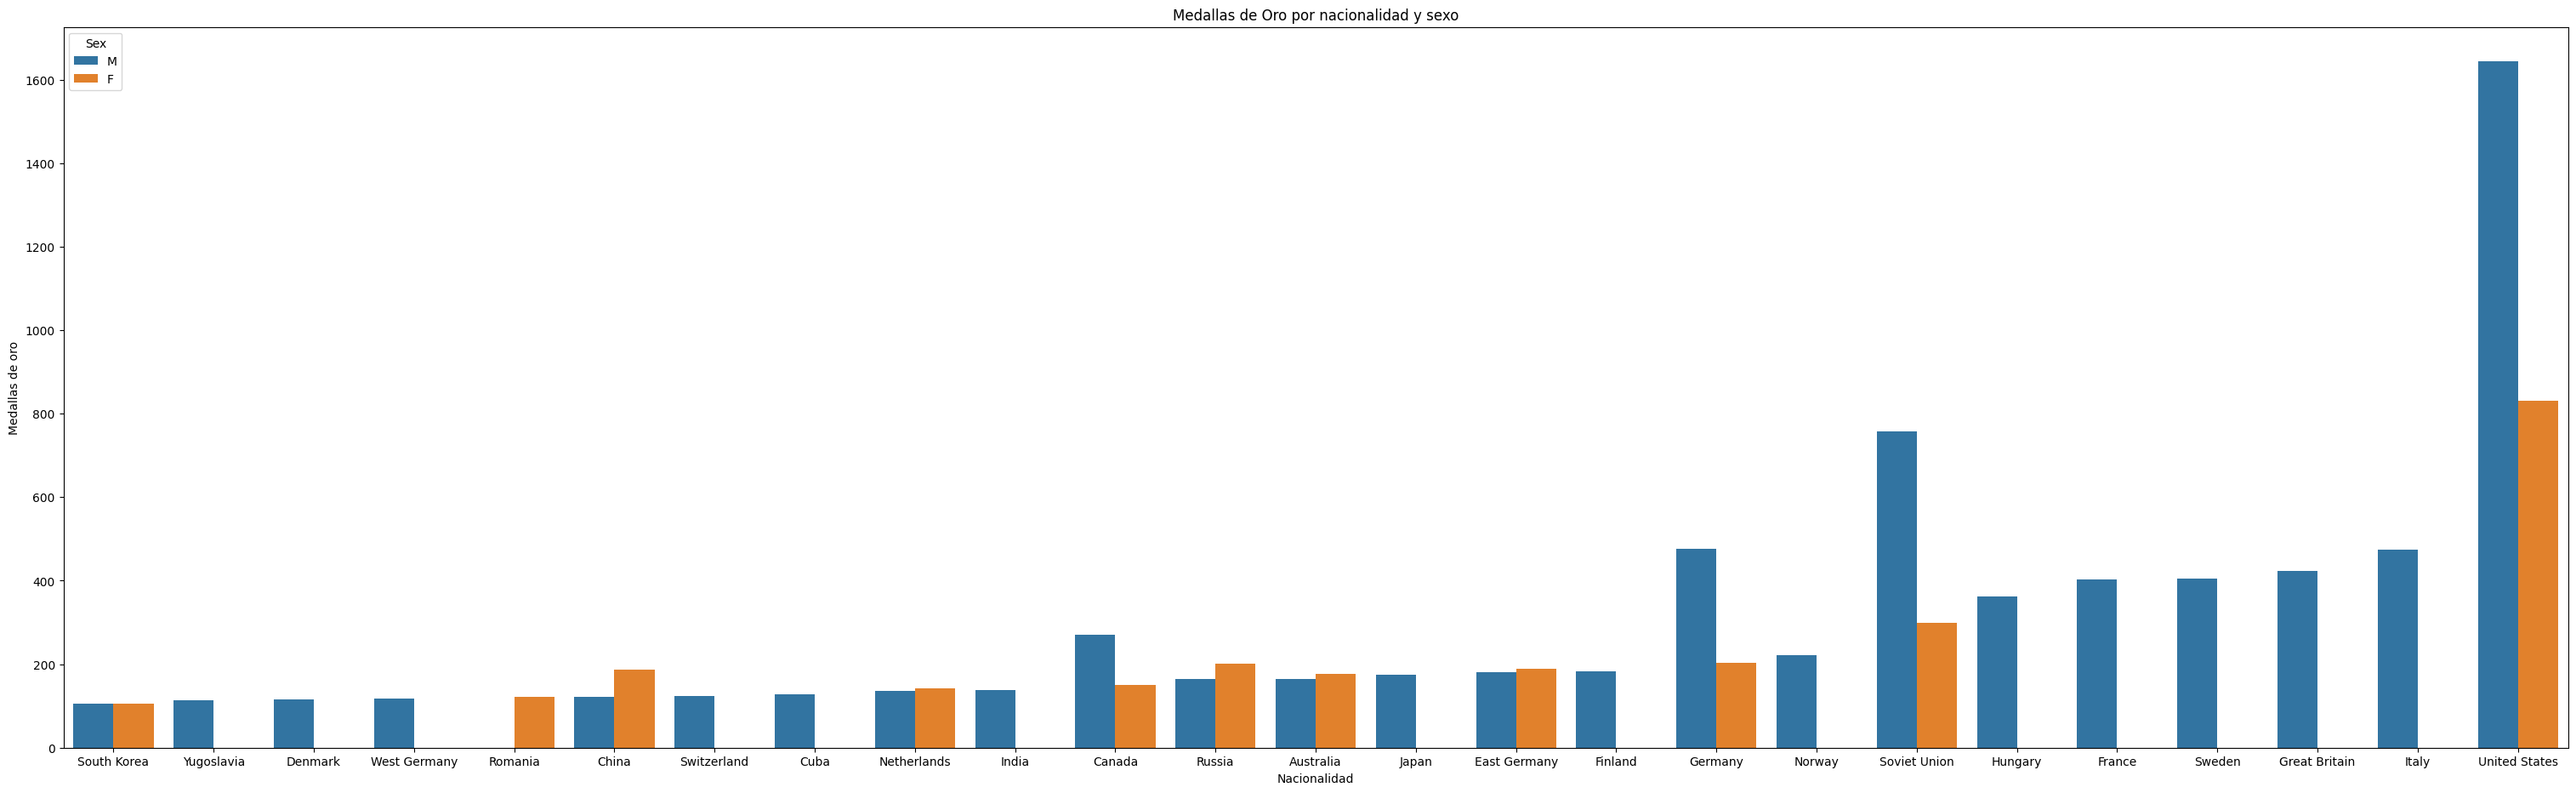

In [23]:
plt.figure(figsize=(38,11))
sns.barplot(y='Medal',x='Team',hue='Sex',data=sdf3)
plt.title('Medallas de Oro por nacionalidad y sexo')
plt.ylabel('Medallas de oro')
plt.xlabel('Nacionalidad')
max_y_value = 900

En este gráfico se estudia las nacionalidades según ganadores de medallas de oro y por sexo.Identificamos 2 países con un número de medallas signifitivamente mayor que el resto, **EEUU** y **Rusia** (Antigua Unión Sovética). Lo cuál era de esperarse por ser países de alta población y fuertemente enfocados en los deportes. De cerca los siguen varios países con apróximadamente **400 a 500** medallas en categoría masculina incluyendo **Francia, Italia, Gran Bretaña,Alemania y Suecia**.

In [47]:
#Aplicamos el mismo estudio per considerando las medallas totales ganadas
nacdf = df[['Sex','Team','Medal']].groupby(by=['Team','Sex']).count().reset_index()
nac1df = nacdf.sort_values(by='Medal', ascending=True)
nac2df = nac1df[nac1df['Medal']>2000]
#Se filtarn los paises que tienen ganadas mas de 2000 medallas en el periodo estudiado

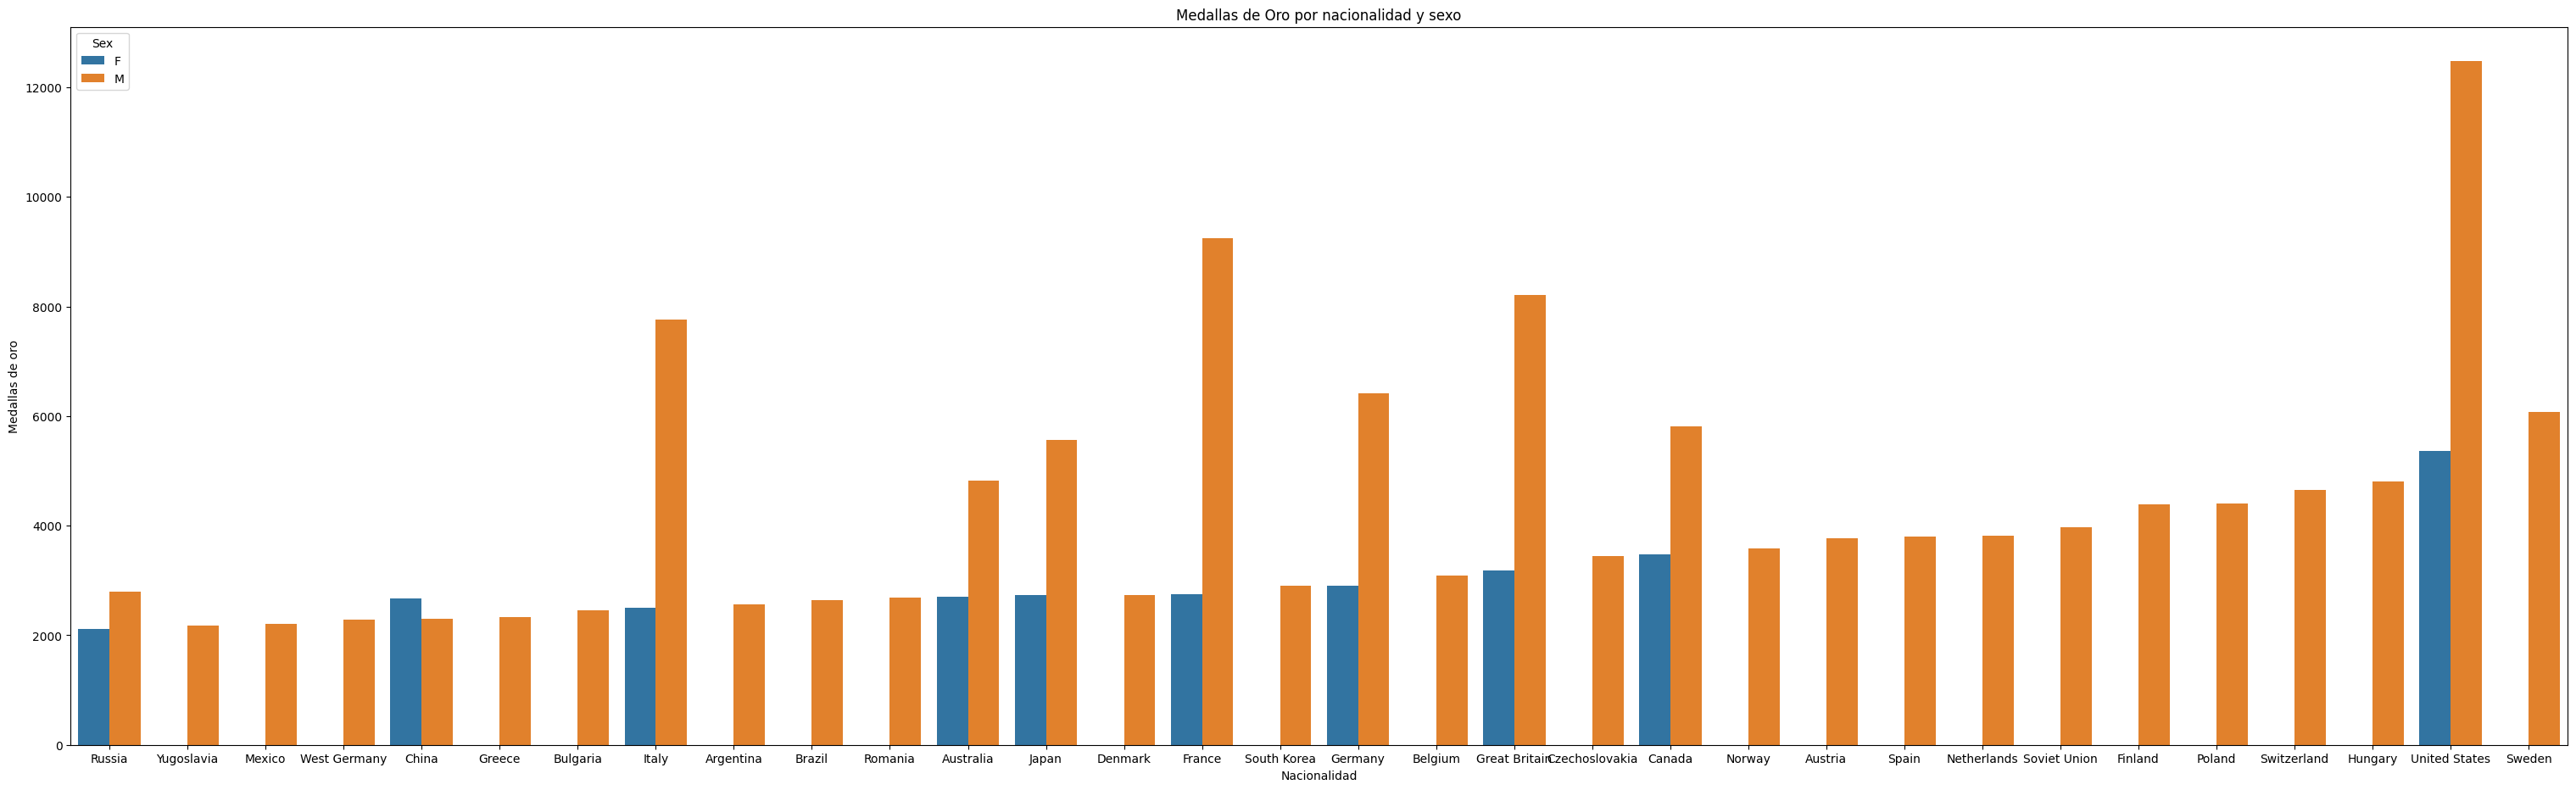

In [51]:
plt.figure(figsize=(38,11))
sns.barplot(y='Medal',x='Team',hue='Sex',data=nac2df)
plt.title('Medallas de Oro por nacionalidad y sexo')
plt.ylabel('Medallas de oro')
plt.xlabel('Nacionalidad')
max_y_value = 900

En este gráfico se estudia las nacionalidades según ganadores de medallas por sexo. Podemos observar que **EEUU** sigue encabezando con aproximadamente 12000 medallas y los otros punteros se mantienen sin cambios significativos. Esto refleja que estos países presentan un gran volumen de atletas muy aptos para la victoria.

In [24]:
#Utilizamos crosstab para estudio de sexos a lo largo del tiempo
sexyear = pd.crosstab(df.Sex.values,df.Year.values )
sexyear

col_0,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
row_0,,,,,,,,,,,,,,,,,,,,,
F,0,33,16,11,47,87,134,261,437,369,...,1384,5431,1582,5546,1757,5816,1847,5815,2023,6223
M,380,1903,1285,1722,3054,3953,4158,5432,5137,2952,...,2221,8390,2527,7897,2625,7786,2555,7105,2868,7465


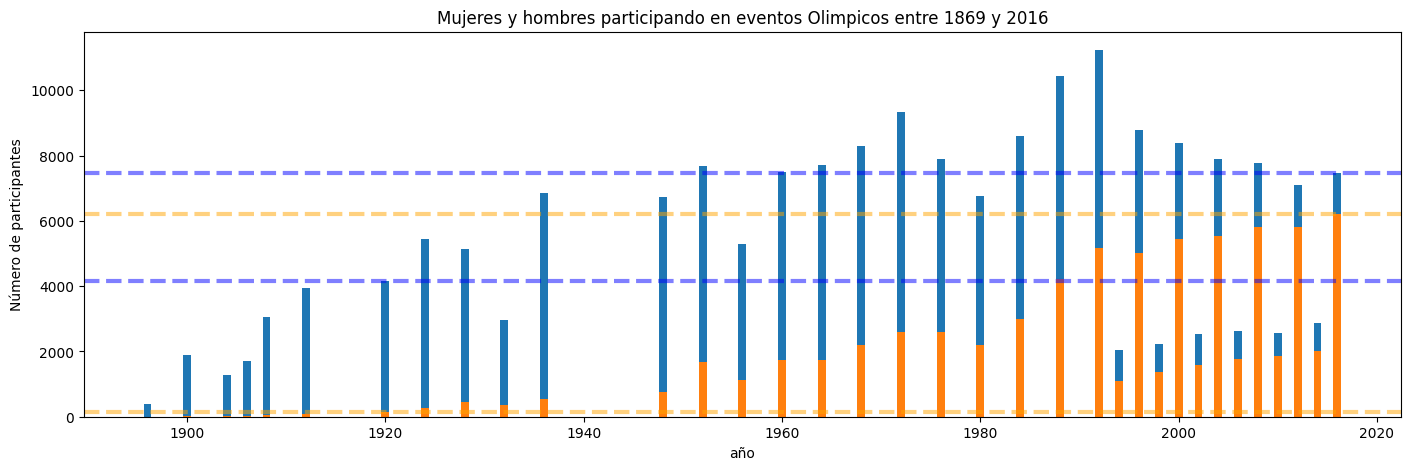

In [25]:
#En base al gráfico anterior se muestra la distiribución de ambos sexos durante los años - Se resaltan la cantidad de atletas de cada texto en los años 1920 y 2016 para observar cambio en la brecha entre ambos sexos
#esto nos sirve para evaluar si el sexo sigue siendo una condicional considerable como lo fue a comienzos de los eventos olímpicos
fig, ax = plt.subplots(figsize=(17,5))
ax.bar(sexyear.columns,sexyear.iloc[1])
ax.bar(sexyear.columns,sexyear.iloc[0])
ax.set_title('Mujeres y hombres participando en eventos Olimpicos entre 1869 y 2016')
ax.set_ylabel('Número de participantes')
ax.set_xlabel('año')
ax.axhline(134, color='orange', linestyle='--', alpha=0.5,    linewidth=3, label='Mujeres 1920')
ax.axhline(6223, color='orange', linestyle='--', alpha=0.5, linewidth=3, label='Mujeres 2016')
ax.axhline(4158, color='blue', linestyle='--', alpha=0.5,    linewidth=3, label='Hombres 1920')
ax.axhline(7465, color='blue', linestyle='--', alpha=0.5, linewidth=3, label='Hombres 2016')

Se estudia la brecha existente entre hombres y mujeres a partir del año 1920 porque es cuando porque a partir de este año comienza a haber un incremento significativo en la participación femenina. En **1920** hay y una diferencia de aproximadamente **4000** participantes de diferencia entre ambos sexos, pero en **2016** la misma disminuye a **1200**. Casi un 25% respecto al inicio del estudio. Esto comprueba que el sexo deja de ser tan determinante en la actualidad ya que la proporción se ha balanceado considerablemente.

**Modelos de Machine Learning**

Utilizaremos modelos de clasificación, ya que contamos con pocos atributos numéricos. Enfocándonos en el reconocimiento de variables que identifiquen a los atletas prominentes.

Se quieren predecir las mejores variables mediante el método de Forward.

In [52]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    pvals = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
            pvals.append(new_pval.min())
            print(best_features, new_pval.min())
        else:
            break
    return best_features, pvals

In [53]:
df.head()

,Name,Sex,Age,Height,Weight,Team,Year,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,1992,Barcelona,Basketball,Basketball Men's Basketball,None
1,A Lamusi,M,23.0,170.0,60.0,China,2012,London,Judo,Judo Men's Extra-Lightweight,None
2,Gunnar Nielsen Aaby,M,24.0,175.0,70.0,Denmark,1920,Antwerpen,Football,Football Men's Football,None
3,Edgar Lindenau Aabye,M,34.0,175.0,70.0,Denmark/Sweden,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


In [54]:
#Genero subset con variables numéricas
df_forw = df[['Age','Height','Weight','Year']]
x

0         180.0
1         170.0
2         175.0
3         175.0
4         185.0
          ...  
271111    179.0
271112    176.0
271113    176.0
271114    185.0
271115    185.0
Name: Height, Length: 271116, dtype: float64

In [55]:
#Determino que variable de output quiero evaluar - Age es la que obtuvo el menor valor de p respecto al resto
x = df_forw.drop('Age', 1)
y = df_forw['Age']

<ipython-input-55-1f4a83bccd76>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = df_forw.drop('Age', 1)


In [56]:
x

,Height,Weight,Year
0,180.0,80.0,1992
1,170.0,60.0,2012
2,175.0,70.0,1920
3,175.0,70.0,1900
4,185.0,82.0,1988
...,...,...,...
271111,179.0,89.0,1976
271112,176.0,59.0,2014
271113,176.0,59.0,2014
271114,185.0,96.0,1998


In [57]:
y

0         24.0
1         23.0
2         24.0
3         34.0
4         21.0
          ... 
271111    29.0
271112    27.0
271113    27.0
271114    30.0
271115    34.0
Name: Age, Length: 271116, dtype: float64

In [58]:
forward_selection(x,y)

<ipython-input-52-f3c9a8106453>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-52-f3c9a8106453>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


['Weight'] 0.0
['Weight', 'Year'] 0.0
['Weight', 'Year', 'Height'] 2.2755039266857846e-53


<ipython-input-52-f3c9a8106453>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-52-f3c9a8106453>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


(['Weight', 'Year', 'Height'], [0.0, 0.0, 2.2755039266857846e-53])

Se observa que la series seleccionadas tienen un p muy bajo respecto a la edad por lo que tienen una buena correlación entre ellas. Esto tiene sentido ya que la edad es un factor genérico entre todas las disciplinas mientras que la altura y peso dependen mucho de la disciplina a evaluar, por ejemplo en basketball espero que los jugadores de mayor altura sean más propensos a ganar medallas de oro.

 En este dataset no cuento con muchas variables cuantificables para evaluar relaciones lineales por lo que se seleccionana todas menos Año porque corresponde a la fecha de participación el cual no es un parámetro que nos interese para nuestro objetivo planteado.

**Se utiliza árbol de decisión como modelo de clasificación**


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,confusion_matrix,ConfusionMatrixDisplay,accuracy_score, recall_score,precision_score
from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector as SequentialFeatureSelector2

import warnings
warnings.filterwarnings('ignore')

In [60]:
#Defino parámetros de dataframe para evaluar en el modelo
dfx = df[['Age','Height','Weight']]
dfx

,Age,Height,Weight
0,24.0,180.0,80.0
1,23.0,170.0,60.0
2,24.0,175.0,70.0
3,34.0,175.0,70.0
4,21.0,185.0,82.0
...,...,...,...
271111,29.0,179.0,89.0
271112,27.0,176.0,59.0
271113,27.0,176.0,59.0
271114,30.0,185.0,96.0


In [61]:
#Defino la serie de predicción del modelo basandonos en que predecir ganadores de medalla de Oro como determinante de buenos atletas
dfmedal = df['Medal'] == 'Gold'

In [62]:
dfy = dfmedal
dfy

0         False
1         False
2         False
3          True
4         False
          ...  
271111    False
271112    False
271113    False
271114    False
271115    False
Name: Medal, Length: 271116, dtype: bool

In [63]:
#definimos x e y para el modelo
#definimos 80% de datos para training y el resto para testing
x = dfx
y = dfy
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
preds1 = modelo.predict(X_train)
preds2 = modelo.predict(X_test)

In [64]:
#Matriz de confusión para training
confusion = metrics.confusion_matrix(y_train, preds1)
confusion.ravel()
confusion

array([[206003,    170],
       [  9686,   1033]])

In [65]:
#Matriz de confusión para testing
confusion = metrics.confusion_matrix(y_test, preds2)
confusion.ravel()
confusion

array([[51342,   229],
       [ 2611,    42]])

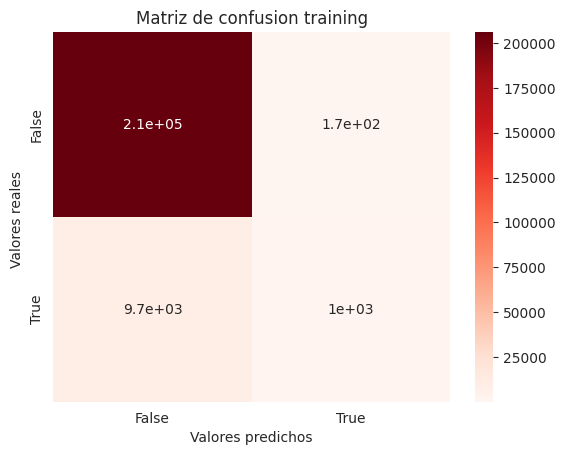

In [66]:
#Para una mejor visualización
#Matriz de training
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_train, preds1)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds')
ax.set_title('Matriz de confusion training');
ax.set_xlabel('Valores predichos')
ax.set_ylabel('Valores reales ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

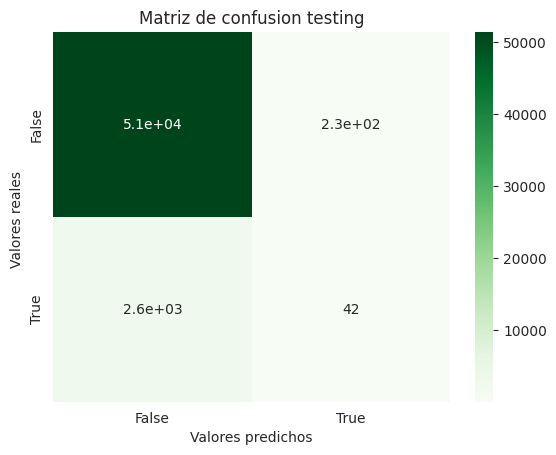

In [67]:
#Matriz de testing
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, preds2)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Greens')
ax.set_title('Matriz de confusion testing');
ax.set_xlabel('Valores predichos')
ax.set_ylabel('Valores reales ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

A simple vista podemos ver que el modelo tanto en training como testing es muy robusto en la calificación de Falsos positivos pero sucede lo contrario en los casos de Verdaderos positivos. También se observa que en ambos casos aparecen falsas alarmas considerables pero en el training son levemente mayores.


In [68]:
#Visualizamos parámetros de performance de training
print(metrics.classification_report(y_train, preds1))

              precision    recall  f1-score   support

       False       0.96      1.00      0.98    206173
        True       0.86      0.10      0.17     10719

    accuracy                           0.95    216892
   macro avg       0.91      0.55      0.57    216892
weighted avg       0.95      0.95      0.94    216892



In [69]:
#Visualizamos parámetros de performance de testing
print(metrics.classification_report(y_test, preds2))

              precision    recall  f1-score   support

       False       0.95      1.00      0.97     51571
        True       0.15      0.02      0.03      2653

    accuracy                           0.95     54224
   macro avg       0.55      0.51      0.50     54224
weighted avg       0.91      0.95      0.93     54224



Tenemos un f1-score alto para las predicciones de Negativos por lo que demuestran una alta precisión y sensibilidad(recall) lo cual se refleja en los valores mostrados.
En cuanto a las predicciones de positivios sucede totalmente lo contrario por lo que el modelo falla en este tipo de predicción. Aún así hay que considerar que en el training el f1-score para Verdaderos es de 0,17 y en el testing 0,03 lo, una diferencia considerable.

**Conclusiones de modelo de clasificación**


En base a los parámetros de performance obtenidos podría pensarse que estamos frente a un caso de underfitting donde el modelo tras el training no es capaz de predecir valores con nuevos datos. Sin embargo hay otros puntos a evaluar.


La gran diferencia entre predicciones de Verdaderos positivos y Negativos positivos que sucede en training se ve luego reflejado en el testing. Esto se debe a que existe una gran diferencia entre la cantidad de clases que le estoy dando al modelo en el parámetro de "Medallas de Oro", hay una gran cantidad de Falsos y muy pocos Positivos. Por eso la primer medida para mejorar el modelo sería alimentarlo con mas casos de ganadores de medalla de oro.


También hay que considerar que a pesar de que el training tiene una mejor performance para predecir Verdaderos no debemos dejar de lado que los casos de falsas alarmas son un poco menor a lo esperado para el testing manteniendo un valor muy similar a los casos de training. esto deja en duda si el training obtuvo mejores resultados respecto al testing y en si estamos frente a un caso de underfitting






**Nuevo enfoque para modelo de ML**

Consideraremos todas las medallas obtenidas para aumentar la cantidad de datos suministrados

In [70]:
#Vamos a volver a usal el modelo de ML pero incluyendo a todos los ganadores de medallas para aportarle más casos positivos a nuestro modelo
string_to_bool = {'Gold': True,'Silver': True,'Bronze': True, 'NaN': False}

In [71]:
def str_to_bool(s):
    return string_to_bool.get(s, False)
dfmedals = df['Medal'].map(str_to_bool)

In [72]:
#Definimos serie con ganadores de medallas como True
dfmedals

0         False
1         False
2         False
3          True
4         False
          ...  
271111    False
271112    False
271113    False
271114    False
271115    False
Name: Medal, Length: 271116, dtype: bool

In [73]:
dfy = dfmedals
dfx = df[['Age','Height','Weight']]
#definimos x e y para el modelo
#definimos 80% de datos para training y el resto para testing
x = dfx
y = dfy
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
preds1 = modelo.predict(X_train)
preds2 = modelo.predict(X_test)

In [74]:
#Matriz de confusión para training
confusion = metrics.confusion_matrix(y_train, preds1)
confusion.ravel()
confusion

array([[183809,   1241],
       [ 27251,   4591]])

In [75]:
#Matriz de confusión para testing
confusion = metrics.confusion_matrix(y_test, preds2)
confusion.ravel()
confusion

array([[45253,  1030],
       [ 7576,   365]])

Podemos observar que dismiuyó levemente la identificación de Verdaderos negativos pero a cambio de eso se clasificaron correctamente Verdaderos positivos. **4591 vs 1033** en training y **365 vs 42** para testing. Esta es una mejora considerable frente al modelo anterior.

Los falsos positivos presentan un leve aumento:

**1241 vs 170** en train y **1030 vs 42** en test

Los falsos negativos presentan una disminución considerable:

**9686 vs 27251** en train y **2611 vs 7576** en test

Estos últimos parámetros se solapan un poco entre ellos porque por donde uno mejora el otro empeora, esto tiene sentido porque el modelo está siendo evaluado con muchos más datos de True.


Training array 1º modelo ([[206003,    170],
                          [  9686,   1033]])


Testing array 1º modelo ([[51342,   229],
                          [ 2611,    42]])

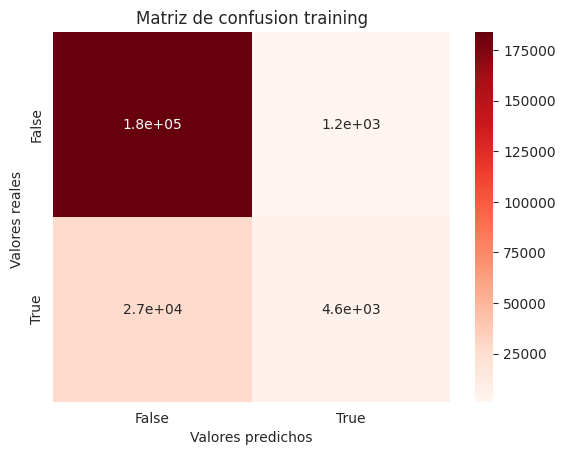

In [76]:
#Para una mejor visualización
#Matriz de training
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_train, preds1)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds')
ax.set_title('Matriz de confusion training');
ax.set_xlabel('Valores predichos')
ax.set_ylabel('Valores reales ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

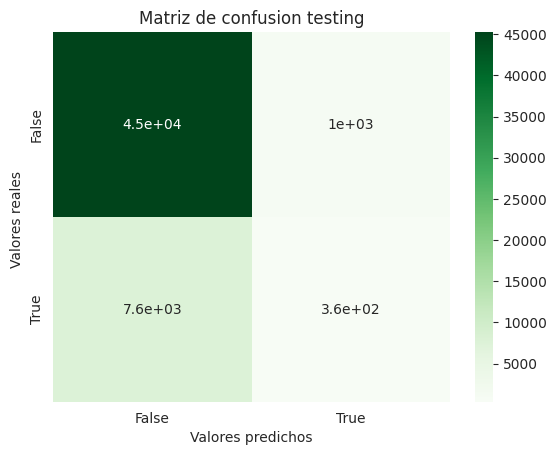

In [77]:
#Matriz de testing
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, preds2)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Greens')
ax.set_title('Matriz de confusion testing');
ax.set_xlabel('Valores predichos')
ax.set_ylabel('Valores reales ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [78]:
#Visualizamos parámetros de performance de training
print(metrics.classification_report(y_train, preds1))

              precision    recall  f1-score   support

       False       0.87      0.99      0.93    185050
        True       0.79      0.14      0.24     31842

    accuracy                           0.87    216892
   macro avg       0.83      0.57      0.59    216892
weighted avg       0.86      0.87      0.83    216892



In [79]:
#Visualizamos parámetros de performance de testing
print(metrics.classification_report(y_test, preds2))

              precision    recall  f1-score   support

       False       0.86      0.98      0.91     46283
        True       0.26      0.05      0.08      7941

    accuracy                           0.84     54224
   macro avg       0.56      0.51      0.50     54224
weighted avg       0.77      0.84      0.79     54224



Dada todas las variaciones en los distintos tipos de clasificación nos vamos a enfocar en el f1-score que evalua precisión y sensibilidad en conjunto.

*   Para clasificar falsos el f1-score disminuyo muy poco, menos de un 10%
*   Para clasificar positivos el f1-score aumentó en casi un 300% de 0,03 a 0,08 para el testing
*   La exactitud disminuyó de 97% a 84% pero teniendo en cuenta que tenemos aproximadamente un triple de valores true a evaluar en el nuevo modelo es algo esperable

En definitva sacrificamos un poco de performance de positivos para mejorar notoriamente la de negativos haciendo un modelo mucho más robusto y capaz de adaptarse a datos nuevos, por lo tanto se puede considerar que el cambio realizado tuvo muy buenos resultados.

**Modelo anterior (training y testing repectivamente)**

                precision    recall  f1-score   support

       False       0.96      1.00      0.98    206173
        True       0.86      0.10      0.17     10719

    accuracy                           0.95    216892


                precision recall  f1-score   support

       False       0.95      1.00      0.97     51571
        True       0.15      0.02      0.03      2653

    accuracy                           0.95     54224


**Visualización de métrica ROU AUC de la matriz de confusión optimizada**

In [80]:
modelo.predict_proba(X_test)

array([[0.80592048, 0.19407952],
       [0.89944444, 0.10055556],
       [0.995     , 0.005     ],
       ...,
       [0.99478992, 0.00521008],
       [0.91419819, 0.08580181],
       [1.        , 0.        ]])

In [81]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test.values, modelo.predict_proba(X_test)[:,1])

0.5678246469000934

Se utiliza ROC AUC por su buena aplicación el clasificación binaria. El valor obtenido es muy cercano a 0.5 lo cual significa que nuestro modelo es poco eficiente en la predicciòn realizada

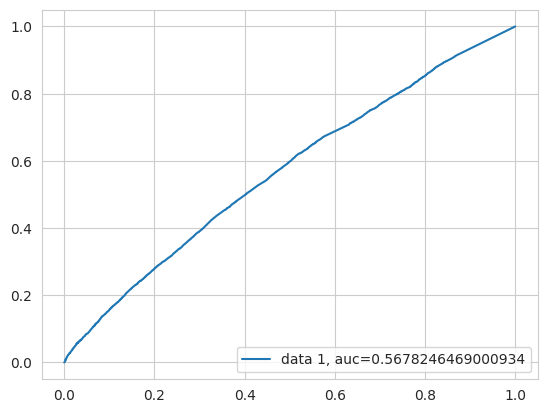

In [82]:
#Visualizamos la curva ROC AUC
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test.values,  modelo.predict_proba(X_test)[:,1])
auc = metrics.roc_auc_score(y_test, modelo.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**Se procede a optimizar hiperparámetros del modelo de clasificación**

In [83]:
#cargamos librerias Sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()
cross_val_score(clf, iris.data, iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [84]:
#Establecemos parámetros de prueba
from sklearn.model_selection import GridSearchCV
parameters  = {'criterion': ['entropy'], 'max_depth':[3, 5, 10], 'min_samples_leaf': [5, 1, 3]}
rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters)
clf.fit(X_train, y_train)
sorted(clf.cv_results_)

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_criterion',
 'param_max_depth',
 'param_min_samples_leaf',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [85]:
#Obtenemos el top de parámetros a utilizar
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.992775,1.180254,0.327564,0.051072,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.853178,0.853178,0.853197,0.853197,0.853197,0.853190,0.000010,1
1,6.783532,1.250279,0.371643,0.042433,entropy,3,1,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.853178,0.853178,0.853197,0.853197,0.853197,0.853190,0.000010,1
2,6.000164,1.346590,0.404830,0.204036,entropy,3,3,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.853178,0.853178,0.853197,0.853197,0.853197,0.853190,0.000010,1
3,5.662184,0.714645,0.349159,0.044786,entropy,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.853178,0.853178,0.853197,0.853197,0.853197,0.853190,0.000010,1
4,5.683158,0.769836,0.346951,0.044807,entropy,5,1,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.853178,0.853178,0.853197,0.853197,0.853197,0.853190,0.000010,1
5,6.079378,0.803400,0.365149,0.041279,entropy,5,3,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.853178,0.853178,0.853197,0.853197,0.853197,0.853190,0.000010,1
6,11.337690,3.697608,0.694399,0.338952,entropy,10,5,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.853155,0.853178,0.853197,0.853197,0.853174,0.853180,0.000016,8
7,8.292569,0.948880,0.516576,0.033528,entropy,10,1,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.853132,0.853201,0.853197,0.853128,0.853197,0.853171,0.000034,9
8,8.306210,0.749939,0.519004,0.051718,entropy,10,3,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.853178,0.853178,0.853197,0.853197,0.853174,0.853185,0.000010,7


**Optimización del modelo mediante reducción de variables mediante PCA**

In [86]:
df

,Name,Sex,Age,Height,Weight,Team,Year,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,1992,Barcelona,Basketball,Basketball Men's Basketball,None
1,A Lamusi,M,23.0,170.0,60.0,China,2012,London,Judo,Judo Men's Extra-Lightweight,None
2,Gunnar Nielsen Aaby,M,24.0,175.0,70.0,Denmark,1920,Antwerpen,Football,Football Men's Football,None
3,Edgar Lindenau Aabye,M,34.0,175.0,70.0,Denmark/Sweden,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
...,...,...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,M,29.0,179.0,89.0,Poland-1,1976,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,None
271112,Piotr ya,M,27.0,176.0,59.0,Poland,2014,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",None
271113,Piotr ya,M,27.0,176.0,59.0,Poland,2014,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",None
271114,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,1998,Nagano,Bobsleigh,Bobsleigh Men's Four,None


In [87]:
#dropeamos columnas que no aplican para nuestro modelo de clasificación#
df.drop('Name', axis='columns', inplace=True)
df.drop('Team', axis='columns', inplace=True)
df.drop('City', axis='columns', inplace=True)
df.drop('Sport', axis='columns', inplace=True)
df.drop('Event', axis='columns', inplace=True)

In [88]:
#las posibles variables de interés las convertimos en números para incorporarlos al modelo#
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['Medal'] = df['Medal'].map({'None': 0, 'Bronze': 1,'Silver': 2,'Gold': 3})

In [89]:
df

,Sex,Age,Height,Weight,Year,Medal
0,1,24.0,180.0,80.0,1992,0
1,1,23.0,170.0,60.0,2012,0
2,1,24.0,175.0,70.0,1920,0
3,1,34.0,175.0,70.0,1900,3
4,0,21.0,185.0,82.0,1988,0
...,...,...,...,...,...,...
271111,1,29.0,179.0,89.0,1976,0
271112,1,27.0,176.0,59.0,2014,0
271113,1,27.0,176.0,59.0,2014,0
271114,1,30.0,185.0,96.0,1998,0


In [90]:
#importamos la bibilioteca de PCA#
from sklearn.decomposition import PCA
pca = PCA().fit(df)
pca.components_.shape

(6, 6)

In [91]:
#Visualizamos los scores de las relaciones entre las variables#
componentes = pd.DataFrame(data = pca.components_, columns = df.columns, index = range(1,pca.components_.shape[0]+1))
componentes.head()

,Sex,Age,Height,Weight,Year,Medal
1,0.004262,0.020446,-0.015266,-0.015465,-0.999544,0.001553
2,0.014900,0.077664,0.560451,0.824159,-0.019652,0.004185
3,0.003683,0.988461,-0.149496,0.008980,0.022380,0.000260
4,-0.004321,-0.128312,-0.814353,0.565987,0.001034,-0.001991
5,-0.047845,-0.000609,-0.003362,-0.001829,0.001415,0.998846


In [92]:
var_explicada=pca.explained_variance_ratio_

Text(0.5, 0, 'Componente Principal')

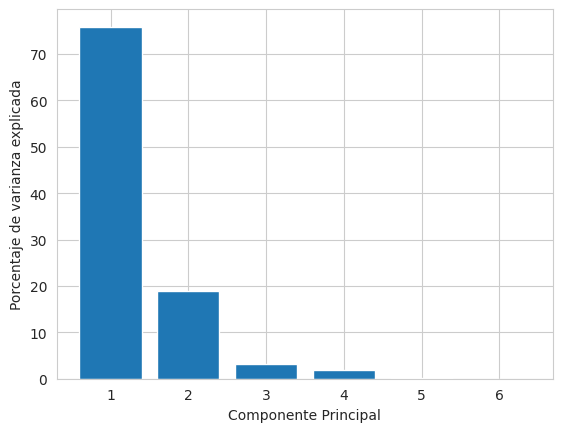

In [93]:
#graficamos variables según su relevancia para el estudio, se descartan las variables 5 y 6 en base a los resultados#
plt.bar(x=componentes.index, height = var_explicada*100)
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componente Principal')

In [94]:
#Definimos nuevas variables para el modelo#
dfx = df[['Age','Height','Weight']]
dfy = df[['Sex']]

In [95]:
#Usamos el modelo de clasificación Randomforest#
x = dfx
y = dfy
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
preds1 = modelo.predict(X_train)
preds2 = modelo.predict(X_test)

In [96]:
#Visualizamos parámetros de performance de training
print(metrics.classification_report(y_train, preds1))

              precision    recall  f1-score   support

           0       0.80      0.63      0.70     59635
           1       0.87      0.94      0.90    157257

    accuracy                           0.85    216892
   macro avg       0.83      0.79      0.80    216892
weighted avg       0.85      0.85      0.85    216892



In [97]:
#Visualizamos parámetros de performance de testing
print(metrics.classification_report(y_test, preds2))

              precision    recall  f1-score   support

           0       0.73      0.57      0.64     14887
           1       0.85      0.92      0.88     39337

    accuracy                           0.82     54224
   macro avg       0.79      0.75      0.76     54224
weighted avg       0.82      0.82      0.82     54224



**Conclusión de optimización de variables**

Con las nuevas métricas utilizadas los todos los indicadores de performance dan valores inferiores respecto al modelado inicial. Inclusive hay una disminución de los mismos al comparar training con testing, lo cual nos marca las dificultades que presenta el modelo ante el estudio de nuevos datos.


#Conclusión general del proyeto

Mediante las visualizaciones y los modelos de predicción utilizados pudimos identificar acertadamente los atletas con mejores cualidades a nivel competitivo. Es posible utilizar los datos obtenidos para generar un criterio válido al momento de elegir los atletas de interés.

Basándonos en las métricas de performance del modelo de machine learning podemos observar que nuestro modelo es viable pero podría mejorar incorporando mayor cantidad de datos para la etapa de testing.

En la optimización de parámetros no obtuvimos resultados prometedores lo cual era de esperarse ya que el dataset cuenta con una cantidad limitada de columnas con pocas variables que aporten al estudio. Además las mismas presentan muy poca correlación entre ellas lo cuál hace que el modelo tenga complicaciones al momento de clasificar correctamente.

A su vez los parámetros son bastante relativos ya que no debemos olvidar que el dataset contiene varias disciplinas distintas en las cuales los parámetros obtenidos pueden cambiar abruptamente, como ser al considerar el peso de un luchador de sumo y un maratonista. Esto incorpora una nueva dificultad para nuestro modelo.
